In [ ]:
from servicex import deliver, dataset
from func_adl_servicex_xaodr22 import FuncADLQueryPHYSLITE, cpp_float


def func_adl_xaod_typed():
    query = FuncADLQueryPHYSLITE()  # type: ignore
    jets_per_event = query.Select(lambda e: e.Jets('AnalysisJets'))
    jet_info_per_event = jets_per_event.Select(
        lambda jets: {
            'pt': jets.Where(lambda j: (j.pt() / 1000 > 30)).Select(lambda j: j.pt() / 1000),
            'eta': jets.Select(lambda j: j.eta()),
            'emf': jets.Select(lambda j: j.getAttribute[cpp_float]('EMFrac'))
            }
    )

    spec = {
        'Sample': [{
            'Name': "func_adl_xAOD_simple",
            'Dataset': dataset.FileList(
                [
                    "root://eospublic.cern.ch//eos/opendata/atlas/rucio/mc20_13TeV/DAOD_PHYSLITE.37622528._000013.pool.root.1",  # noqa: E501
                ]
            ),
            'Query': jet_info_per_event,
            'Codegen': 'atlasr22',
        }]
    }
    files = deliver(spec, servicex_name="atlasr22")
    assert files is not None, "No files returned from deliver! Internal error"
    return files


if __name__ == "__main__":
    files = func_adl_xaod_typed()
    assert len(files['func_adl_xAOD_simple']) == 1

Output()

In [2]:
print(files)

{'func_adl_xAOD_simple': ['/tmp/servicex_rjanusia/b7dd780e-9a6c-4514-a19f-438b509c79ce/root___eospublic.cern.ch__eos_opendata_atlas_rucio_mc20_13TeV_DAOD_PHYSLITE.37622528._000013.pool.root.1']}


In [2]:
import uproot
import awkward as ak
file_path = files['func_adl_xAOD_simple'][0]

In [3]:
file = uproot.open(file_path)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
array = file['atlas_xaod_tree;1']['pt'].arrays(library="ak").pt
flat = ak.flatten(array)

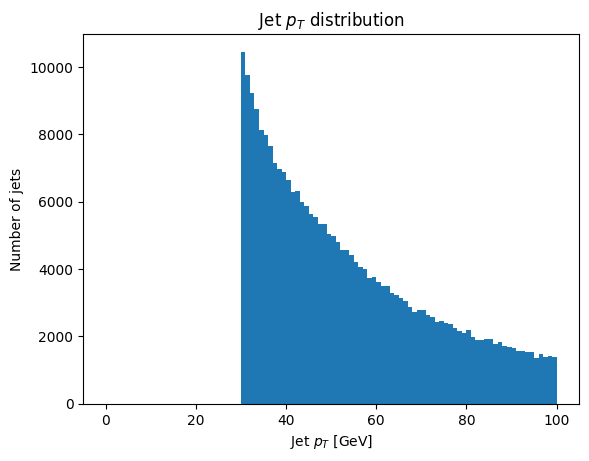

In [6]:
plt.hist(flat, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution')
